Explorations using the TreeGAMClassifier.

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imodels import TreeGAMClassifier
from imodels.util.extract import extract_marginal_curves
import imodels
from collections import defaultdict
import joblib
import dvu
dvu.set_style()
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Basic example

In [6]:
X, y, feat_names = imodels.get_clean_dataset("heart")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13
)

m = TreeGAMClassifier(
    n_boosting_rounds=0,
    random_state=42,
    n_boosting_rounds_marginal=5,
    max_leaf_nodes_marginal=3,
)
m.fit(X_train, y_train)
roc_auc = metrics.roc_auc_score(y_test, m.predict_proba(X_test)[:, 1])
acc = metrics.accuracy_score(y_test, m.predict(X_test))
print(f"Class imbalance (train: {np.mean(y_train):.3f}) (test: {np.mean(y_test):.3f})")
print(
    f"Train roc auc: {metrics.roc_auc_score(y_train, m.predict_proba(X_train)[:, 1]):.3f}"
)
print(f"Train Accuracy: {metrics.accuracy_score(y_train, m.predict(X_train)):.3f}")
print(f"Test roc auc: {roc_auc:.3f}")
print(f"Test Accuracy: {acc:.3f}")

feature_vals_list, shape_function_vals_list = extract_marginal_curves(
    m, X_train, max_evals=100
)

Class imbalance (train: 0.426) (test: 0.519)
Train roc auc: 0.924
Train Accuracy: 0.574
Test roc auc: 0.935
Test Accuracy: 0.481


[-0.00502065  0.          0.00489961  0.00624517  0.00773995]


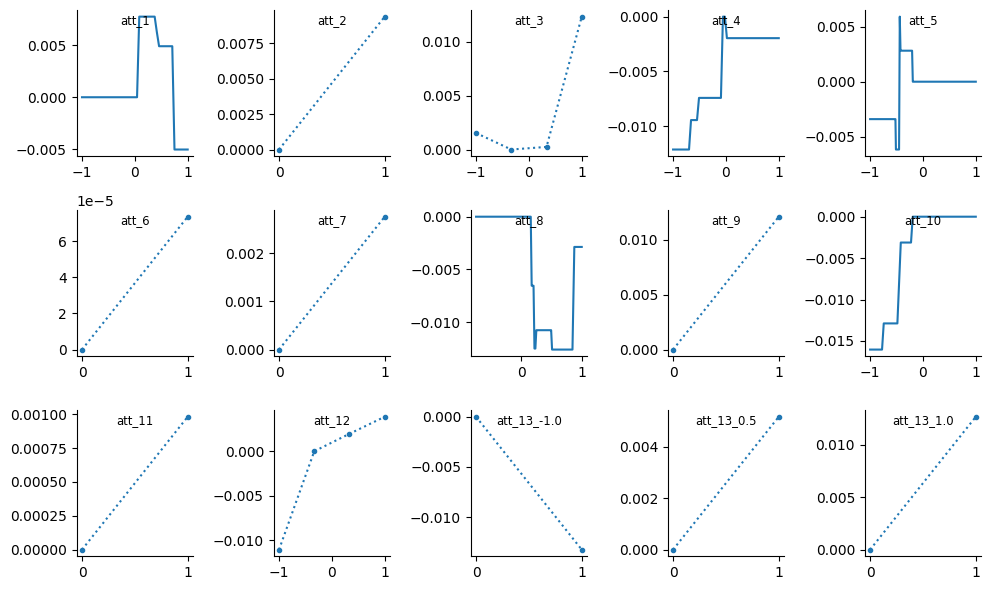

In [7]:
def plot_shape_function_vals_list_list(
    feature_vals_list_list, shape_function_vals_list_list, feat_names
):
    # plot them all
    for i in range(len(feature_vals_list_list)):
        feature_vals_list = feature_vals_list_list[i]
        shape_function_vals_list = shape_function_vals_list_list[i]
        print(np.unique(shape_function_vals_list[0]))
        if i == 0:
            p = len(feature_vals_list)
            R = int(np.floor(np.sqrt(p)))
            C = int(np.ceil(p / R))
            plt.figure(figsize=(C * 2, R * 2))
        for feat_num in range(p):
            plt.subplot(R, C, feat_num + 1)
            categorical = len(feature_vals_list[feat_num]) <= 5
            if categorical:
                kwargs = {"marker": ".", 'linestyle': ':'}
            else:
                kwargs = {}
            plt.plot(
                feature_vals_list[feat_num],
                shape_function_vals_list[feat_num],
                **kwargs
            )
            # add title inset in plot
            plt.title(
                feat_names[feat_num],
                loc="center",
                y=1,
                pad=-10,
                fontsize='small',
            )
        plt.tight_layout()
        # plt.show()
plot_shape_function_vals_list_list([feature_vals_list], [shape_function_vals_list], feat_names)